In [3]:
library(naturalsort)
library(data.table)
library(data.tree)
library(Biostrings)
library(fields)
dataDir <- '~/jackgl/Data/Simulations/053018/simout053018_8/'

In [4]:
flst<-list.files(dataDir) # Get list of files from directory
flst <- naturalsort(flst) # Natural sort the files
nclst <- c() # Total number of cells for each simulation
ncls <- c() # Number of cells for each genotype
rs <- c() # Birth rate for each genotype

nGeno <- c() # Number of genotypes for each simulation

for (i in 1:25) { # Loop over files
    load(paste0(dataDir,flst[i])) # Load the current simulation output file
    nGeno[i] <- CellPop$totalCount # Get number of genotypes in population (number of L1 insertions)
    if (CellPop$totalCount==1) { # If the genotype tree has 1 node
        ncls[[i]] <- CellPop$ncells[length(CellPop$ncells)]
    }
    else {
        ncls[[i]] <- vapply(CellPop$Get('ncells'),tail,n=1L,FUN.VALUE = numeric(1))
    }
    nclst[[i]] <- N # Get total number of cells
    rs[[i]] <- CellPop$Get('B') # Get the division rates of all nodes
    rm('CellPop','N')
    
}

In [5]:
# Function for computing mode value
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [6]:
rs_var <- c()
rs_mean <- c()
rs_max <- c()
# cellPs_var <- c()
# cellPs_mean <- c()
ncls_var <- c()

for (i in 1:length(rs)) {
    
    if (length(rs[[i]])==1) {rs_var[i] <- 0}
#     if (length(cellPs[[i]])==1) {cellPs_var[i] <- 0}
    
    else {
        rs_var[i] <- var(rs[[i]])
        rs_mean[i] <- mean(rs[[i]])
        rs_max[i] <- max(rs[[i]])
#         cellPs_var[i] <- var(cellPs[[i]])
#         cellPs_mean[i] <- mean(cellPs[[i]])
    }
    ncls_var[i] <- var(ncls[[i]])

}

In [7]:
norml <- function(x) {
    x = (x-min(x))/(max(x)-min(x))
    return(x)}

In [8]:
nclsot <- nclst
nclst <- lapply(nclst,tail,n=1)

In [9]:
matrix(nclst[1:25],nrow=5,ncol=5,byrow=TRUE)

65536,65028,57854,63869,63782
65540,65248,65097,64343,62549
65594,66066,61905,64314,63870
65598,65695,64768,63940,59463
72180,65101,62253,65293,63165


In [10]:
matrix(rs_mean[1:25],nrow=5,ncol=5,byrow=TRUE)

1.000000,0.9909651,0.9777165,0.9822643,0.9879692
1.000445,0.9924197,0.9907443,0.9842672,0.9882225
1.001126,0.9974285,0.9842284,0.9886700,1.0097071
1.001080,0.9966606,0.9894361,0.9848614,0.9915331
1.075106,1.0001456,0.9846637,0.9983469,0.9902622


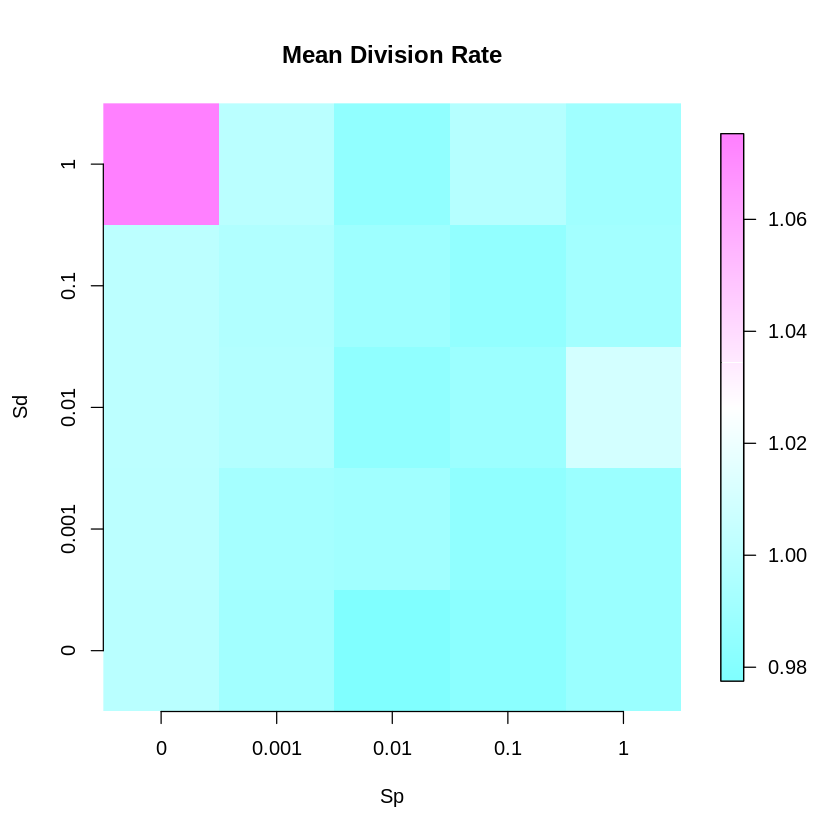

In [11]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(rs_mean[1:25],nrow=5,ncol=5,byrow=TRUE),2,rev)),axes=F,col=cm.colors(256))

title(main="Mean Division Rate",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 
axis(2, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 

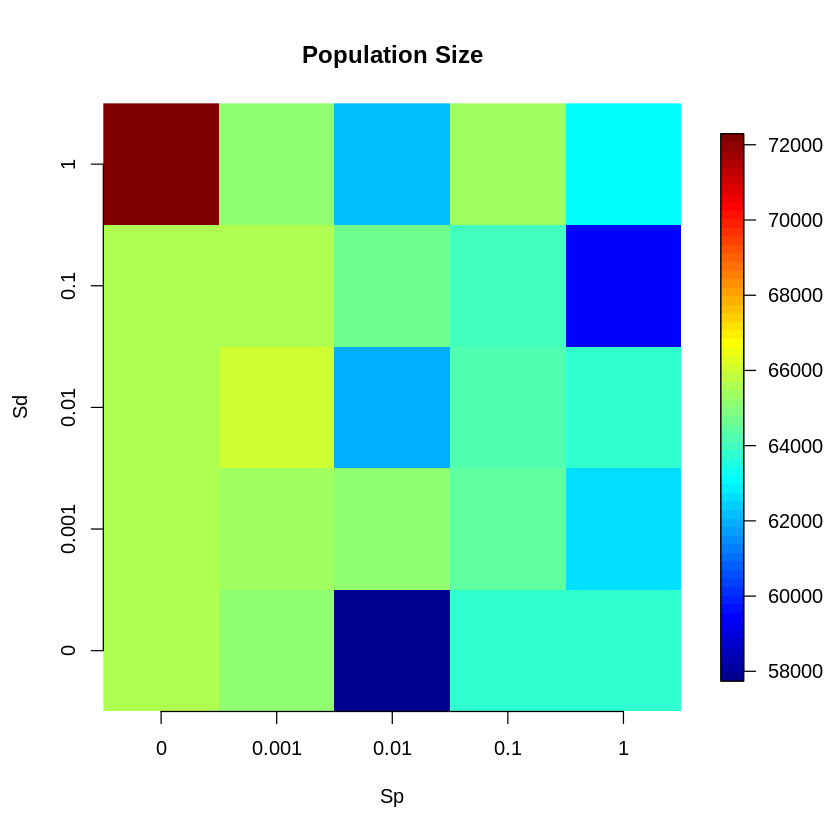

In [12]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(unlist(nclst[1:25]),nrow=5,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Population Size",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 
axis(2, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 

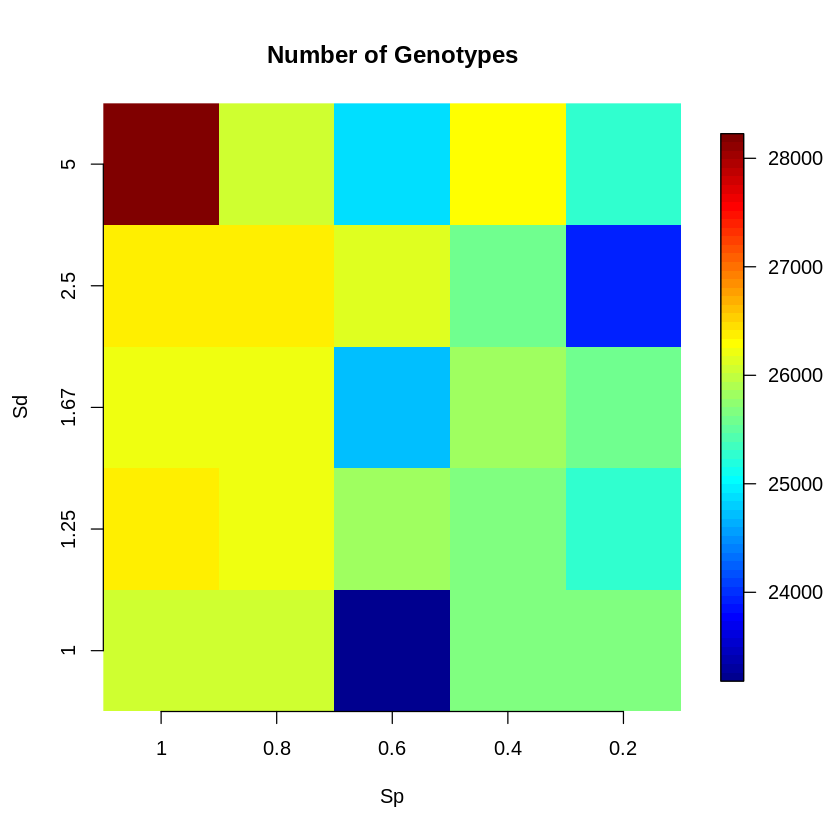

In [13]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(nGeno[1:25],nrow=5,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Number of Genotypes",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=seq(1.0,0.2,-0.2)); 
axis(2, at=seq(0,1,0.25), labels=c(1.00,1.25,1.67,2.50,5.00)); 

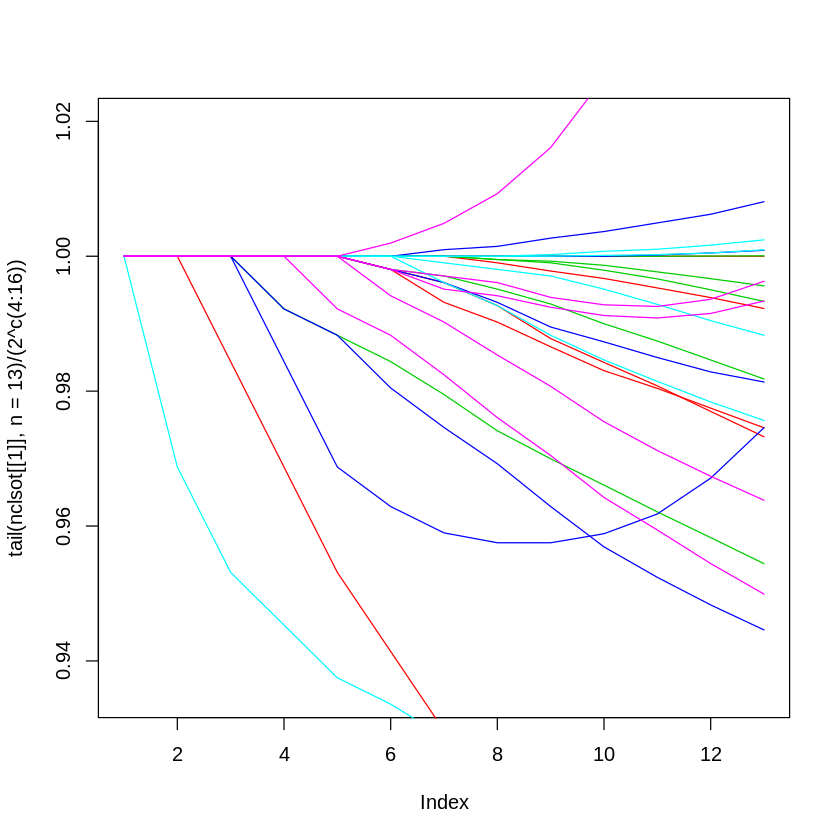

In [14]:
colscheme = c("green2","turquoise3","steelblue3","grey","black")
plot(tail(nclsot[[1]],n=13)/(2^c(4:16)),type='n',ylim=c(0.935,1.02))
# plot(tail(nclsot[[1]],n=13))
# cols = c(rep(c(2:6),5))
cols = c(2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6)
for (i in 1:25) {
    lines(tail(nclsot[[i]],n=13)/(2^c(4:16)),col=cols[i])
#     lines(tail(nclsot[[i]],n=13))
}

In [15]:
save(nclsot,nclst,ncls,rs,file='~/Desktop/out053018/8.rda')